# モジュール読み込み・データセットアップ

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import torch
from sklearn.model_selection import train_test_split
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# transformersをインストール
#!pip install transformers
#!pip install mecab-python3==0.996.2 fugashi ipadic
from transformers import BertJapaneseTokenizer, BertModel

In [3]:
def fix_seed(seed):
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

SEED = 5
fix_seed(SEED)

## データの確認

In [4]:
import glob
import pandas as pd
# データの読み込み。適宜パスは変えてください。
paths = glob.glob("../data/review/review_df_yahoo*.csv")
review_df = pd.concat([pd.read_csv(path) for path in paths])

In [5]:
review_df

,Unnamed: 0,Uid,Name,Id,Body,Subject,Guid,Author,Rating,VisitDate,Scene,UsefulCount,LinkUrl,CreateDate,UpdateDate
0,0,00756aac93987b1156d8c071bbaea643630b6b7a,リーガロイヤルホテル,189ec8b01155573763cc299e090407bcfcdfaa0e,チェックイン時、受付の方がムスッとしていて感じが悪かったです。\nお風呂が最初から詰まってい...,接客・対応がイマイチ,6Z3F3U6T3WWWZXPOILGLA7JF2E,Pocopon,2.0,2014-09-01T00:00:00+09:00,NaN,NaN,NaN,2014-11-09T02:55:27+09:00,2015-02-19T22:18:31+09:00
1,1,51a779978276db9650f17160a78a622971488e8f,株式会社ロイヤルホテル,189ec8b01155573763cc299e090407bcfcdfaa0e,チェックイン時、受付の方がムスッとしていて感じが悪かったです。\nお風呂が最初から詰まってい...,接客・対応がイマイチ,6Z3F3U6T3WWWZXPOILGLA7JF2E,Pocopon,2.0,2014-09-01T00:00:00+09:00,NaN,NaN,NaN,2014-11-09T02:55:27+09:00,2015-02-19T22:18:31+09:00
2,2,a3699933d853da8740d0bbd3f173a21c1967610d,海遊館,c0280e4dbb5c15ec038de950474acf9e1a63e66b,大分昔に開館した頃に一度行きました。そのときの印象は強烈でした。大きな水槽にジンベイザサメが...,オープン以来二度目,ZQ2ZXS5FL7FCRMX5FJ46KFT25I,nes*oa*i,3.0,NaN,NaN,NaN,NaN,2013-05-25T09:37:16+09:00,2015-02-20T07:21:59+09:00
3,3,06d12433319a3cc7ea08f7fd7f2b8ddbbf17a251,ザ・リッツ・カールトン大阪,00470d2de619b955855933c14240f45ee0cf593f,クラブスーペリア ツインで宿泊しました。結構のんびり出来ました。色々とお願いしましたが、聞き...,ゆっくり出来るﾎﾃﾙ （クラブスーペリア ツイン】,BVDAU3AKZRDTUYBEPHSPKI3SSU,ひろ,4.5,NaN,NaN,NaN,NaN,2011-07-18T14:33:30+09:00,2015-02-20T07:23:00+09:00
4,4,e925dd934eaadb8d563e2bf20ae86b5cac1fe09d,リッツ・カールトン大阪,00470d2de619b955855933c14240f45ee0cf593f,クラブスーペリア ツインで宿泊しました。結構のんびり出来ました。色々とお願いしましたが、聞き...,ゆっくり出来るﾎﾃﾙ （クラブスーペリア ツイン】,BVDAU3AKZRDTUYBEPHSPKI3SSU,ひろ,4.5,NaN,NaN,NaN,NaN,2011-07-18T14:33:30+09:00,2015-02-20T07:23:00+09:00
5,5,194c1d2131d9611e6666f0993252158bc45ba4eb,株式会社ファイナルセレクト 買取１１０番,cfd4ea1f859da7d54a5fc4855d321e21533cd28d,雰囲気がすごく良くて、気さくなスタッフさんだったので、お話が本当にしやすくて、質問にも1つ1...,カメラの買取,5HQM7XUOKSTWJX3NY55HZGWUAY,kmh*****,5.0,NaN,NaN,NaN,NaN,2017-02-24T19:53:39+09:00,2017-02-24T19:53:39+09:00
6,6,8ce188c2662207f3cdfb39a5438be0ae936ad11c,買取１１０番,cfd4ea1f859da7d54a5fc4855d321e21533cd28d,雰囲気がすごく良くて、気さくなスタッフさんだったので、お話が本当にしやすくて、質問にも1つ1...,カメラの買取,5HQM7XUOKSTWJX3NY55HZGWUAY,kmh*****,5.0,NaN,NaN,NaN,NaN,2017-02-24T19:53:39+09:00,2017-02-24T19:53:39+09:00
7,7,906748897873e64c74d82c89743b4df02beb99cc,パティスリー・コージ,827a43d0927731cbb3a2694d3cc147eb42a280ee,可も無く不可も無く、平均点のケーキと焼き菓子でした。少し甘いかな・・・,うーーん・・・,NaN,NaN,3.0,NaN,3.0,NaN,NaN,2010-09-29T03:03:05+09:00,2010-09-29T03:03:05+09:00
8,8,1c7bb4b25fb0384cbf042e213484e351b7315a32,ウェスティンホテル大阪,fd2596809e4ceb2fe1510a27be235d0e85f9c799,備品かばん中入れてるとかありえんしなぁ笑\n岩なんとかって書いてあったわ名前。オシャレなホテ...,ホテルはいいが従業員がなぁ,O5MM4QPPV44N6MRHYN4DM3SV5Q,tom*_9*327,2.0,NaN,NaN,1.0,NaN,2011-12-13T10:16:15+09:00,2015-02-19T18:26:07+09:00
9,9,91072ddb3c5d36603756562e134b118cf787e87e,阪急百貨店,d04cb5f769fbf03071c4d4f9dd369c7237f95fda,普段百貨店には行かないのですが、見たいものがあって行ったところ、店員に人格を否定されることを...,NaN,4I2FQNFOOYNLKKMITNARF746NY,cin*****,1.0,NaN,NaN,NaN,NaN,2019-08-22T20:55:01+09:00,2019-08-22T20:55:01+09:00


In [6]:
# Rating>3ならpositive、Rating<3ならnegativeとする。Rating==3は使用しない。
def Ratingmap(x):
    if x > 3:
        return 1
    elif x < 3:
        return 0
    else:
        return -1
train_df = pd.DataFrame({"id":review_df["Id"],
                         "text":review_df["Body"],
                         "label":review_df["Rating"].map(Ratingmap)})
train_df = train_df.drop_duplicates()
train_df = train_df[train_df["label"]!= -1].copy()

In [7]:
train_df.head(5)

,id,text,label
0,189ec8b01155573763cc299e090407bcfcdfaa0e,チェックイン時、受付の方がムスッとしていて感じが悪かったです。\nお風呂が最初から詰まってい...,0
3,00470d2de619b955855933c14240f45ee0cf593f,クラブスーペリア ツインで宿泊しました。結構のんびり出来ました。色々とお願いしましたが、聞き...,1
5,cfd4ea1f859da7d54a5fc4855d321e21533cd28d,雰囲気がすごく良くて、気さくなスタッフさんだったので、お話が本当にしやすくて、質問にも1つ1...,1
8,fd2596809e4ceb2fe1510a27be235d0e85f9c799,備品かばん中入れてるとかありえんしなぁ笑\n岩なんとかって書いてあったわ名前。オシャレなホテ...,0
9,d04cb5f769fbf03071c4d4f9dd369c7237f95fda,普段百貨店には行かないのですが、見たいものがあって行ったところ、店員に人格を否定されることを...,0


In [8]:
train_df["label"].value_counts()

1    6775
0    2235
Name: label, dtype: int64

In [9]:
train_df=pd.concat([(train_df[train_df["label"]==1].sample(n=2000)),train_df[train_df["label"]==0].sample(n=2000)])
train_df["label"].value_counts()

1    2000
0    2000
Name: label, dtype: int64

In [10]:
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese")   
for i,item in enumerate(tokenizer.vocab.items()):
    print(item)
    if i > 100:
        break

('[PAD]', 0)
('[UNK]', 1)
('[CLS]', 2)
('[SEP]', 3)
('[MASK]', 4)
('の', 5)
('、', 6)
('に', 7)
('。', 8)
('は', 9)
('た', 10)
('を', 11)
('で', 12)
('と', 13)
('が', 14)
('し', 15)
('て', 16)
('1', 17)
('な', 18)
('年', 19)
('れ', 20)
('い', 21)
('あ', 22)
('(', 23)
(')', 24)
('2', 25)
('さ', 26)
('こ', 27)
('も', 28)
('か', 29)
('##する', 30)
('ある', 31)
('日', 32)
('いる', 33)
('する', 34)
('・', 35)
('「', 36)
('月', 37)
('」', 38)
('19', 39)
('から', 40)
('20', 41)
('大', 42)
('ア', 43)
('そ', 44)
('こと', 45)
('##して', 46)
('ま', 47)
('3', 48)
('や', 49)
('として', 50)
('中', 51)
('一', 52)
('人', 53)
('よ', 54)
('ス', 55)
('によ', 56)
('4', 57)
('なっ', 58)
('その', 59)
('ら', 60)
('-', 61)
('れる', 62)
('『', 63)
('など', 64)
('』', 65)
('フ', 66)
('シ', 67)
('##リー', 68)
('同', 69)
('この', 70)
('出', 71)
('時', 72)
('お', 73)
('地', 74)
('だ', 75)
('5', 76)
('行', 77)
('201', 78)
('国', 79)
('ない', 80)
('的', 81)
('ため', 82)
('後', 83)
('られ', 84)
('発', 85)
('200', 86)
('##ール', 87)
('イ', 88)
('##ラン', 89)
('作', 90)
('日本', 91)
('##ター', 92)
('##ック', 93)
('市',

In [11]:
pad = tokenizer.vocab["[PAD]"]
max_lengths=512

In [12]:
# tokenizerの分割例
text = "カーネーションが綺麗だった"
tokenizer.tokenize(text)

['カーネ', '##ーション', 'が', '綺麗', 'だっ', 'た']

## input_dataの作成

In [13]:
# tokenをid化
token = ["[CLS]"]+tokenizer.tokenize(text)[:max_lengths-2]+["[SEP]"]
input_id = tokenizer.convert_tokens_to_ids(token)
# 1文のみなのでsegment_idは全て0
segment_id = [0]*max_lengths
# input_idが存在する箇所に1を立てる
attention_mask = [1]*len(input_id)+[0]*(max_lengths - len(input_id))
input_id = input_id+[pad]*(max_lengths-len(input_id))

In [14]:
print("text:",text)
print("token:",token)
print("input_id:",input_id[:15],"len:",len(input_id))
print("segment_id:",segment_id[:15],"len:",len(segment_id))
print("attention_mask:",attention_mask[:15],"len:",len(attention_mask))

text: カーネーションが綺麗だった
token: ['[CLS]', 'カーネ', '##ーション', 'が', '綺麗', 'だっ', 'た', '[SEP]']
input_id: [2, 22377, 950, 14, 27344, 308, 10, 3, 0, 0, 0, 0, 0, 0, 0] len: 512
segment_id: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] len: 512
attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0] len: 512


In [15]:
# 上記のinput_dataの作成方法をもとにdataset化
class ReviewDataset(torch.utils.data.Dataset):
        def __init__(self, texts, labels=[]):
                self.input_ids, self.segment_ids, self.attention_masks = [],[],[]
                for text in texts:
                    token = ["[CLS]"]+tokenizer.tokenize(text)[:max_lengths-2]+["[SEP]"]
                    input_id = tokenizer.convert_tokens_to_ids(token)
                    segment_id = [0]*max_lengths
                    attention_mask = [1]*len(input_id)+[0]*(max_lengths - len(input_id))
                    input_id = input_id+[pad]*(max_lengths-len(input_id))
                    self.input_ids.append(input_id)
                    self.segment_ids.append(segment_id)
                    self.attention_masks.append(attention_mask)
                self.input_ids = np.array(self.input_ids)
                self.segment_ids = np.array(self.segment_ids)
                self.attention_masks = np.array(self.attention_masks)
                self.labels = labels

        def __len__(self):
                return len(self.input_ids)

        def __getitem__(self, idx):
            if len(self.labels):
                return self.input_ids[idx], self.segment_ids[idx], self.attention_masks[idx], self.labels[idx]
            else:
                return self.input_ids[idx], self.segment_ids[idx], self.attention_masks[idx]


In [16]:
# datasetとdataloaderの作成
from sklearn.model_selection import train_test_split
batch_size=8
X,y = train_df["text"].values, train_df["label"].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100,stratify=y)
train_ds = ReviewDataset(texts=X_train, labels=y_train)
train_dl = torch.utils.data.DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)  
val_ds = ReviewDataset(texts=X_val, labels=y_val)
val_dl = torch.utils.data.DataLoader(
    val_ds, batch_size=batch_size, shuffle=False)

In [17]:
# Bertの事前学習済みエンコーダーを使用して2値クラス分類器を作成

class BertClassification(nn.Module):
    def __init__(self, bert):
            super(BertClassification, self).__init__()

            # BERTモジュール
            self.bert = bert    # BERTモデル

            self.cls = nn.Linear(in_features=768, out_features=2)

            # 重み初期化処理
#             nn.init.normal_(self.cls.weight, std=0.01)
#             nn.init.normal_(self.cls.bias, 0)

    def forward(self, input_ids, token_type_ids=None, attention_mask=None):

            # BERTの基本モデル部分の順伝搬
            # 順伝搬させる
        output = self.bert(
                            input_ids, token_type_ids, attention_mask)
        # [CLS]に対応する特徴量を取得します。
        pooled_output = output[0][:,0,:]

        # 入力文章の1単語目[CLS]の特徴量を使用して、ポジ・ネガを分類します
        pooled_output = pooled_output.view(-1, 768)    # sizeを[batch_size, hidden_sizeに変換
        out = self.cls(pooled_output)

        return out

## 学習

In [18]:
cuda = torch.cuda.is_available()
# 学習済みモデルをダウンロード
bert = BertModel.from_pretrained("cl-tohoku/bert-base-japanese")
model =  BertClassification(bert)
if cuda:
    model.cuda()
# optimizerの設定
optimizer = optim.Adam(model.parameters(),lr = 5e-5 ,betas=(0.9, 0.999))

# 損失関数の設定
criterion = nn.CrossEntropyLoss()

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
cuda

True

In [20]:
# 最後以外のBertLayerモジュールのパラメータを固定(実際のタスクでは固定させないことも多い)
# for param in model.bert.transformer.layer[:-3].parameters():
#     param.requires_grad = False

In [21]:
model

BertClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine

In [22]:
## 学習します。
epochs = 5
for epoch in range(epochs):
    total_loss = 0
    accuracy = 0
    model.train()
    
    print("epoch {} start!".format(epoch+1))
    # train
    for iter_num, (input_ids, segment_ids, attention_masks, labels) in tqdm(enumerate(train_dl),total = len(train_dl)):
        optimizer.zero_grad()
        if cuda:
            input_ids, segment_ids, attention_masks, labels =\
            input_ids.cuda(), segment_ids.cuda(), attention_masks.cuda(), labels.cuda()
        # forward(順伝搬)
        outputs = model(input_ids = input_ids)
        pred_proba = outputs.softmax(dim=1)[:,1]
        pred = (pred_proba>=0.5).type(torch.int)
        loss = criterion(outputs,labels)

        # backward(逆伝搬)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        accuracy += (pred==labels).sum().item()
        #50 iterごとにlossとaccuracyを表示
        if (iter_num+1) % 50 == 0:
            size = batch_size*(iter_num+1)
            print("{} iter loss:{:.4f} accuracy:{:.4f}".format(
                    iter_num+1,total_loss/(iter_num+1),accuracy/size))


    total_loss /= len(train_dl)
    accuracy /= len(train_ds)

    # validation
    val_total_loss = 0
    val_accuracy = 0
    model.eval()
    for input_ids, segment_ids, attention_masks, labels in tqdm(val_dl):
        if cuda:
            input_ids, segment_ids, attention_masks, labels =\
            input_ids.cuda(), segment_ids.cuda(), attention_masks.cuda(), labels.cuda()
        with torch.no_grad():
            outputs = model(input_ids = input_ids)
            pred_proba = outputs.softmax(dim=1)[:,1]
            pred = (pred_proba>=0.5).type(torch.int)
            loss = criterion(outputs,labels)
            val_total_loss += loss.item()
            val_accuracy += (pred==labels).sum().item()

    val_total_loss /= len(val_dl)
    val_accuracy /= len(val_ds)
    print("epoch{} total loss:{:.4f}, accuracy:{:.4f}, val_total loss:{:.4f}, val_accuracy:{:.4f}"\
                .format(epoch+1,total_loss,accuracy,val_total_loss,val_accuracy))
    torch.save(model.state_dict(), f'../model/model{epoch}.hdf5')

epoch 1 start!


  0%|          | 0/350 [00:00<?, ?it/s]

50 iter loss:0.7125 accuracy:0.5475
100 iter loss:0.7156 accuracy:0.5175
150 iter loss:0.6983 accuracy:0.5458
200 iter loss:0.6814 accuracy:0.5731
250 iter loss:0.6299 accuracy:0.6190
300 iter loss:0.5781 accuracy:0.6617
350 iter loss:0.5429 accuracy:0.6921


  0%|          | 0/150 [00:00<?, ?it/s]

epoch1 total loss:0.5429, accuracy:0.6921, val_total loss:0.2265, val_accuracy:0.9100
epoch 2 start!


  0%|          | 0/350 [00:00<?, ?it/s]

50 iter loss:0.1723 accuracy:0.9300
100 iter loss:0.1810 accuracy:0.9337
150 iter loss:0.1862 accuracy:0.9300
200 iter loss:0.1894 accuracy:0.9300
250 iter loss:0.2026 accuracy:0.9235
300 iter loss:0.2038 accuracy:0.9225
350 iter loss:0.2013 accuracy:0.9218


  0%|          | 0/150 [00:00<?, ?it/s]

epoch2 total loss:0.2013, accuracy:0.9218, val_total loss:0.2443, val_accuracy:0.9158
epoch 3 start!


  0%|          | 0/350 [00:00<?, ?it/s]

50 iter loss:0.0951 accuracy:0.9675
100 iter loss:0.0872 accuracy:0.9700
150 iter loss:0.0952 accuracy:0.9658
200 iter loss:0.0974 accuracy:0.9650
250 iter loss:0.1013 accuracy:0.9630
300 iter loss:0.1014 accuracy:0.9642
350 iter loss:0.1035 accuracy:0.9643


  0%|          | 0/150 [00:00<?, ?it/s]

epoch3 total loss:0.1035, accuracy:0.9643, val_total loss:0.2406, val_accuracy:0.9175
epoch 4 start!


  0%|          | 0/350 [00:00<?, ?it/s]

50 iter loss:0.0538 accuracy:0.9825
100 iter loss:0.0446 accuracy:0.9850
150 iter loss:0.0529 accuracy:0.9817
200 iter loss:0.0528 accuracy:0.9819
250 iter loss:0.0556 accuracy:0.9830
300 iter loss:0.0566 accuracy:0.9829
350 iter loss:0.0629 accuracy:0.9804


  0%|          | 0/150 [00:00<?, ?it/s]

epoch4 total loss:0.0629, accuracy:0.9804, val_total loss:0.2918, val_accuracy:0.9075
epoch 5 start!


  0%|          | 0/350 [00:00<?, ?it/s]

50 iter loss:0.0467 accuracy:0.9850
100 iter loss:0.0568 accuracy:0.9862
150 iter loss:0.0484 accuracy:0.9883
200 iter loss:0.0417 accuracy:0.9881
250 iter loss:0.0398 accuracy:0.9885
300 iter loss:0.0440 accuracy:0.9867
350 iter loss:0.0402 accuracy:0.9882


  0%|          | 0/150 [00:00<?, ?it/s]

epoch5 total loss:0.0402, accuracy:0.9882, val_total loss:0.2816, val_accuracy:0.9283


## 予測

モデルのロード

In [23]:
model.load_state_dict(torch.load("../model/model2.hdf5"))

<All keys matched successfully>

テスト

In [24]:
X_test = ["今日のランチは最高だった！"]
test_ds = ReviewDataset(texts=X_test)
test_dl = torch.utils.data.DataLoader(
    test_ds, batch_size=1, shuffle=False)

In [25]:
for input_ids, segment_ids, attention_masks in test_dl:
    if cuda:
        input_ids, segment_ids, attention_masks =\
            input_ids.cuda(), segment_ids.cuda(), attention_masks.cuda()
    outputs = model(input_ids = input_ids)
    pred_proba = outputs.softmax(dim=1)[:,1]
    print("入力テキストのポジティブ度: {:.4f}".format(pred_proba.item()))

入力テキストのポジティブ度: 0.9619


テスト2

In [26]:
X_test = ["今日のランチは微妙だった。"]
test_ds = ReviewDataset(texts=X_test)
test_dl = torch.utils.data.DataLoader(
    test_ds, batch_size=1, shuffle=False)

In [27]:
for input_ids, segment_ids, attention_masks in test_dl:
    if cuda:
        input_ids, segment_ids, attention_masks =\
            input_ids.cuda(), segment_ids.cuda(), attention_masks.cuda()
    outputs = model(input_ids = input_ids)
    pred_proba = outputs.softmax(dim=1)[:,1]
    print("入力テキストのポジティブ度: {:.4f}".format(pred_proba.item()))

入力テキストのポジティブ度: 0.0060


# shap

In [28]:
import shap
def f(X_test):
    pred_probas = []
    test_ds = ReviewDataset(texts=X_test)
    test_dl = torch.utils.data.DataLoader(
        test_ds, batch_size=4, shuffle=False)    
    for input_ids, segment_ids, attention_masks in test_dl:
        if cuda:
            input_ids, segment_ids, attention_masks =\
            input_ids.cuda(), segment_ids.cuda(), attention_masks.cuda()
        outputs = model(input_ids = input_ids)
        pred_probas.append(outputs.softmax(dim=1)[:,1].detach().cpu().numpy())
    return np.concatenate(pred_probas)

# SHAP値を計算するインスタンスを生成する
explainer = shap.Explainer(model=f, masker=tokenizer)

## shapの例1

In [29]:
X_test = ["今日のランチは最高だった！","今日のランチは微妙だった"]
shap_values = explainer(X_test)
shap.plots.text(shap_values)

### waterfall_plot

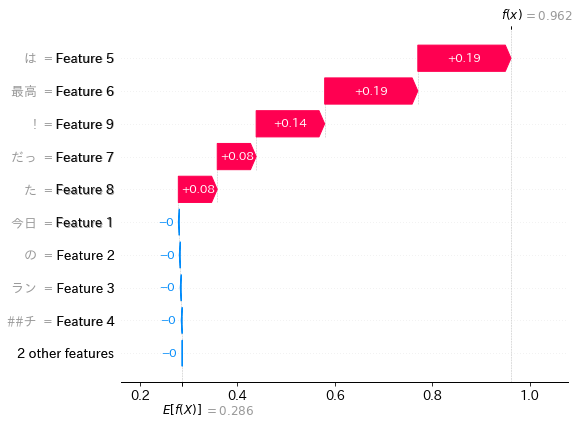

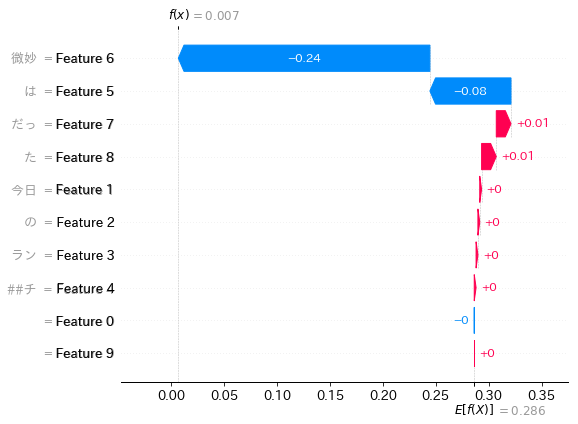

In [30]:
import japanize_matplotlib
for row in range(2):
    shap.waterfall_plot(shap.Explanation(values=shap_values[row].values, 
                                         base_values=shap_values[row].base_values,
                                         data=shap_values[row].data)
                       )

## shapの例2

In [31]:
explainer = shap.Explainer(model=f, masker=tokenizer)
shap_values_Xval = explainer(X_val)

Token indices sequence length is longer than the specified maximum sequence length for this model (671 > 512). Running this sequence through the model will result in indexing errors
Partition explainer: 1201it [08:54,  2.21it/s]                          


In [32]:
preds = f(X_val)

### 予測値の分布

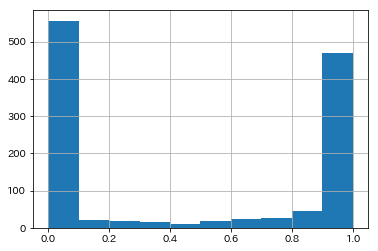

In [33]:
pd.Series(preds).hist()

## shapの結果

In [34]:
np.random.seed(2)

for i in np.random.choice(np.arange(len(X_val)),30):
    print("pred:",f([X_val[i]]))
    shap.plots.text(shap_values_Xval[i])

pred: [0.959386]


pred: [0.98841375]


pred: [0.99110097]


pred: [0.00108218]


pred: [0.9465002]


pred: [0.99291164]


pred: [0.4444581]


pred: [9.6752876e-05]


pred: [0.00011403]


pred: [0.93077886]


pred: [0.99518293]


pred: [0.9912538]


pred: [0.8868581]


pred: [0.9706541]


pred: [0.5605931]


pred: [0.6920451]


pred: [0.01820474]


pred: [0.5057413]


pred: [9.801685e-05]


pred: [0.99765176]


pred: [0.01986678]


pred: [0.96157676]


pred: [0.01273684]


pred: [0.00026742]


pred: [0.99687225]


pred: [0.9976422]


pred: [0.01701526]


pred: [0.0006577]


pred: [0.3071195]


pred: [0.7921492]


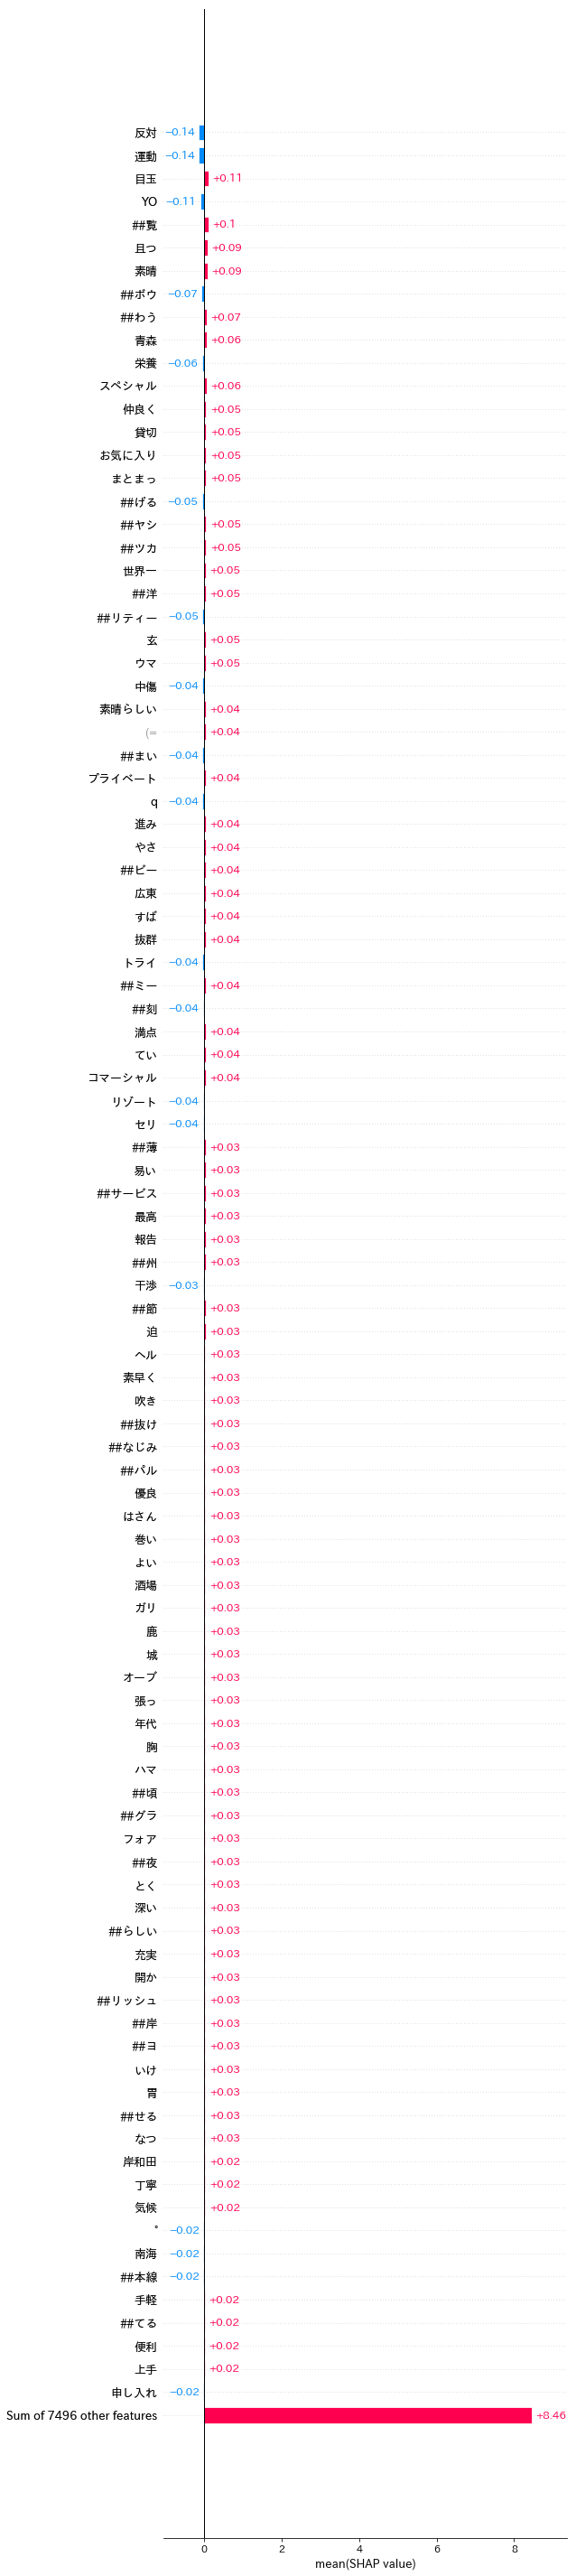

In [35]:
shap.plots.bar(shap_values_Xval.mean(0),max_display=100)